In [1]:
import numpy as np
import pandas as pd
from pymysql import *
from tqdm import tqdm_notebook as tqdm
import missingno as msno
import time

# 跟单记录

In [ ]:
follow_df = pd.read_csv('follow1.1-4.9.csv',encoding = 'utf-8')
print(follow_df.shape)
print(follow_df.info())
follow_df.head()

In [ ]:
follow_df['new_time'] = follow_df.follow_time.apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.strptime(x,"%d/%m/%Y  %H:%M:%S")))
print(follow_df.shape)
print(follow_df.info())
follow_df.head()

In [ ]:
# follow_df['login_name'] = follow_df.creater_name.apply(lambda x: 1 if 'ing' in x else 0)
follow_df['login_name'] = follow_df.creater_name.apply(lambda x: x.split(',')[-1])
follow_df.head()

In [ ]:
follow_df['follow_time'] = follow_df['create_time']
follow_df = follow_df[['login_name','table_id','follow_time']]
follow_df.head()

In [ ]:
follow_df2 = follow_df.groupby(['login_name','table_id']).agg({'follow_time':np.sum}).reset_index()
print(follow_df2.shape)
follow_df2.head()

In [ ]:
history_df = pd.merge(follow_df2,drop_df2,on = ['login_name','table_id'], how='outer')
print(history_df.info())
print(history_df.shape)
history_df.head()

In [ ]:
history_df = pd.merge(follow_df2,drop_df2,on = ['login_name','table_id'])
print(history_df.shape)
history_df.head()

# 调库记录

In [2]:
drop_df = pd.read_csv('drop10.16-04.09.csv',encoding = 'utf-8')
drop_df['label'] = drop_df['name.1']
print(drop_df.shape)
print(drop_df.info())
print(drop_df.label.value_counts())
drop_df.head()

D:\Users\Administrator\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(418906, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418906 entries, 0 to 418905
Data columns (total 6 columns):
table_id       418906 non-null int64
create_time    418906 non-null object
login_name     418906 non-null object
name           418906 non-null object
name.1         418906 non-null object
label          418906 non-null object
dtypes: int64(1), object(5)
memory usage: 19.2+ MB
None
未连跟掉库          164232
剔除审核超时掉库       124245
指定天数未签单掉库       44817
移交超时跟进掉库        43188
离职移交超时掉库        12551
超期未跟进掉库          9872
电销签单未跟掉库         8190
部门分配超时掉库         4711
未首电掉库            3498
抢单超时掉库           1617
返无效驳回超期跟进掉库      1313
电销超时分配掉库          663
超期开发掉库              9
Name: label, dtype: int64


,table_id,create_time,login_name,name,name.1,label
0,19317556,2018-10-16 04:27:17,3061288,成都融资直营中心商务五部,未连跟掉库,未连跟掉库
1,77275,2018-10-16 04:27:25,5150557,广州融资后台一中心后台一部,未连跟掉库,未连跟掉库
2,7740448794797195264,2018-10-16 16:15:03,910753347,佛山融资商务一中心商务二部,未首电掉库,未首电掉库
3,7724865983887097856,2018-10-19 04:03:51,96327286,成都融资直营中心商务十三部,超期开发掉库,超期开发掉库
4,18881640,2018-10-19 04:03:55,96327286,成都融资直营中心商务十三部,超期开发掉库,超期开发掉库


In [3]:
# drop_df['drop_time'] = drop_df['create_time']
drop_df = drop_df[['login_name','table_id','create_time','label']]
drop_df.head()

,login_name,table_id,create_time,label
0,3061288,19317556,2018-10-16 04:27:17,未连跟掉库
1,5150557,77275,2018-10-16 04:27:25,未连跟掉库
2,910753347,7740448794797195264,2018-10-16 16:15:03,未首电掉库
3,96327286,7724865983887097856,2018-10-19 04:03:51,超期开发掉库
4,96327286,18881640,2018-10-19 04:03:55,超期开发掉库


In [4]:
# drop_df2 = drop_df.groupby(['login_name','table_id']).agg({'drop_time':np.sum}).reset_index()
# print(drop_df2.shape)
# drop_df2.head()

# 订单记录

In [5]:
order_df = pd.read_csv('order2018-20190409.csv',encoding = 'utf-8')
order_df['label'] = '已成单'
print(order_df.shape)
print(order_df.info())
print(order_df.label.value_counts())
order_df.head()

(117899, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117899 entries, 0 to 117898
Data columns (total 15 columns):
id                    117899 non-null int64
order_id              117899 non-null int64
business_id           117899 non-null int64
business_no           117899 non-null object
place_order_time      117899 non-null object
customer_id           117899 non-null int64
user_no               117748 non-null float64
business_user_name    117891 non-null object
organization_name     117899 non-null object
sign_org_name         117880 non-null object
business_type_name    117899 non-null object
bt_name               117889 non-null object
status                117899 non-null object
product_amount        117899 non-null float64
label                 117899 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 13.5+ MB
None
已成单    117899
Name: label, dtype: int64


,id,order_id,business_id,business_no,place_order_time,customer_id,user_no,business_user_name,organization_name,sign_org_name,business_type_name,bt_name,status,product_amount,label
0,7636349742137880576,7636349741634564096,7636348060347805696,SJ201801020021,2018-01-02 14:07:34,7636348060372971520,76245836.0,姜仙桥,重庆融资商务二中心商务八部,重庆融资事业部,信贷小贷,信用贷款,ORF_DDZT_2,12000.0,已成单
1,7636361066397970432,7636361066045648896,18270402,SJ201712291497502,2018-01-02 17:16:25,16294154,12034683.0,黄锋,重庆融资商务二中心商务五部,重庆融资事业部,信贷小贷,信用贷款,ORF_DDZT_6,50000.0,已成单
2,7636367610480959488,7636367609885368320,18273827,SJ201712301497777,2018-01-02 16:18:53,16296839,56802695.0,罗程露,重庆融资商务二中心商务五部,重庆融资事业部,信贷小贷,信用贷款,ORF_DDZT_2,70000.0,已成单
3,7636378209898209280,7636378209290035200,17966745,SJ201710301003641,2018-01-02 16:18:53,16048951,56783251.0,陈静,重庆融资商务二中心商务五部,重庆融资事业部,信贷小贷,信用贷款,ORF_DDZT_6,600000.0,已成单
4,7636379623751815168,7636379623177195520,17918754,SJ20171015906424,2018-01-02 15:41:26,16010715,97511357.0,娄世强,重庆融资商务二中心商务二部,重庆融资事业部,银行信贷,信用贷款,ORF_DDZT_2,50000.0,已成单


In [6]:
order_df['login_name'] = order_df['user_no']
order_df['table_id'] = order_df['business_id']
order_df['create_time'] = order_df['place_order_time']
order_df['login_name'].apply(str)
order_df = order_df[['login_name','table_id','create_time','label']]
order_df.head()

,login_name,table_id,create_time,label
0,76245836.0,7636348060347805696,2018-01-02 14:07:34,已成单
1,12034683.0,18270402,2018-01-02 17:16:25,已成单
2,56802695.0,18273827,2018-01-02 16:18:53,已成单
3,56783251.0,17966745,2018-01-02 16:18:53,已成单
4,97511357.0,17918754,2018-01-02 15:41:26,已成单


# 合并订单-调库记录，形成总记录

In [7]:
df = pd.concat([drop_df,order_df],ignore_index=True).sample(frac=1, replace=False)
print(df.shape)
print(df.info())
print(df.label.value_counts())
df.head()

(536805, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536805 entries, 482688 to 345387
Data columns (total 4 columns):
login_name     536654 non-null object
table_id       536805 non-null int64
create_time    536805 non-null object
label          536805 non-null object
dtypes: int64(1), object(3)
memory usage: 20.5+ MB
None
未连跟掉库          164232
剔除审核超时掉库       124245
已成单            117899
指定天数未签单掉库       44817
移交超时跟进掉库        43188
离职移交超时掉库        12551
超期未跟进掉库          9872
电销签单未跟掉库         8190
部门分配超时掉库         4711
未首电掉库            3498
抢单超时掉库           1617
返无效驳回超期跟进掉库      1313
电销超时分配掉库          663
超期开发掉库              9
Name: label, dtype: int64


,login_name,table_id,create_time,label
482688,9.71879e+08,7726326122836926464,2018-09-07 16:46:40,已成单
133059,986463895,7639392266775437312,2019-01-17 21:36:17,未连跟掉库
279301,101447,7794088185638731776,2019-03-22 12:29:34,剔除审核超时掉库
333833,17266578,3635185,2019-03-29 05:15:02,剔除审核超时掉库
373860,103063,7747735703227998208,2019-03-30 05:17:37,剔除审核超时掉库


In [8]:
df = df[df['login_name'] != 'hegui']
print(df.shape)
print(df.info())
print(df.label.value_counts())
df.head()

(536804, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536804 entries, 482688 to 345387
Data columns (total 4 columns):
login_name     536653 non-null object
table_id       536804 non-null int64
create_time    536804 non-null object
label          536804 non-null object
dtypes: int64(1), object(3)
memory usage: 20.5+ MB
None
未连跟掉库          164232
剔除审核超时掉库       124245
已成单            117899
指定天数未签单掉库       44817
移交超时跟进掉库        43188
离职移交超时掉库        12551
超期未跟进掉库          9872
电销签单未跟掉库         8189
部门分配超时掉库         4711
未首电掉库            3498
抢单超时掉库           1617
返无效驳回超期跟进掉库      1313
电销超时分配掉库          663
超期开发掉库              9
Name: label, dtype: int64


,login_name,table_id,create_time,label
482688,9.71879e+08,7726326122836926464,2018-09-07 16:46:40,已成单
133059,986463895,7639392266775437312,2019-01-17 21:36:17,未连跟掉库
279301,101447,7794088185638731776,2019-03-22 12:29:34,剔除审核超时掉库
333833,17266578,3635185,2019-03-29 05:15:02,剔除审核超时掉库
373860,103063,7747735703227998208,2019-03-30 05:17:37,剔除审核超时掉库


In [9]:
writer = pd.ExcelWriter('二分类数据.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

# 读取商务数据

In [10]:
sale_df = pd.read_excel('商务模拟数据.xlsx',encoding = 'utf-8')
sale_df['login_name'].apply(str) 
print(sale_df.shape)
print(sale_df.info())
sale_df.head()

(6589, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 28 columns):
login_name            6589 non-null object
performance_amount    678 non-null float64
每月签单次数                711 non-null float64
working_hours         1353 non-null float64
SUCCESS_CALL_y        897 non-null float64
sex                   5972 non-null float64
work_area             6504 non-null object
work_age              6212 non-null float64
smallyt               6588 non-null object
visit_count           817 non-null float64
平均签单周期                6588 non-null float64
平均备注字数                6588 non-null float64
违规记录                  6588 non-null float64
操行分                   6588 non-null float64
每月日均意向客户数             6588 non-null float64
婚姻情况                  6588 non-null float64
有无子女                  6588 non-null float64
有无房贷                  6588 non-null float64
有无车贷                  6588 non-null float64
近三个月平均收入              6588 non-null float64
芝麻信用分    

,login_name,performance_amount,每月签单次数,working_hours,SUCCESS_CALL_y,sex,work_area,work_age,smallyt,visit_count,...,有无车贷,近三个月平均收入,芝麻信用分,商务级别,日均新增微信好友数,签单率,放款率,资源上门率,客户属性填写,是否离职
0,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,1.0,14039.0,599.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
2,100012,1925.00,NaN,100.72,13.0,1.0,WORK_AREA_BJ,4.0,融资,NaN,...,0.0,22371.0,217.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
3,100017,5367.90,14.0,232.86,1058.0,1.0,WORK_AREA_CD,4.0,融资,44.0,...,1.0,23076.0,490.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
4,100045,490.00,6.0,114.20,NaN,0.0,WORK_AREA_CQ,1.0,融资,8.0,...,1.0,5940.0,191.0,1.0,9.0,0.0,0.0,0.0,4.0,0.0


In [11]:
sale_df.drop(axis=0,index=0,inplace=True)
    
print(sale_df.shape)
print(sale_df.info())
sale_df.head()

(6588, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 1 to 6588
Data columns (total 28 columns):
login_name            6588 non-null object
performance_amount    678 non-null float64
每月签单次数                711 non-null float64
working_hours         1353 non-null float64
SUCCESS_CALL_y        897 non-null float64
sex                   5972 non-null float64
work_area             6504 non-null object
work_age              6212 non-null float64
smallyt               6588 non-null object
visit_count           817 non-null float64
平均签单周期                6588 non-null float64
平均备注字数                6588 non-null float64
违规记录                  6588 non-null float64
操行分                   6588 non-null float64
每月日均意向客户数             6588 non-null float64
婚姻情况                  6588 non-null float64
有无子女                  6588 non-null float64
有无房贷                  6588 non-null float64
有无车贷                  6588 non-null float64
近三个月平均收入              6588 non-null float64
芝麻信用分    

,login_name,performance_amount,每月签单次数,working_hours,SUCCESS_CALL_y,sex,work_area,work_age,smallyt,visit_count,...,有无车贷,近三个月平均收入,芝麻信用分,商务级别,日均新增微信好友数,签单率,放款率,资源上门率,客户属性填写,是否离职
1,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,1.0,14039.0,599.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
2,100012,1925.00,NaN,100.72,13.0,1.0,WORK_AREA_BJ,4.0,融资,NaN,...,0.0,22371.0,217.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
3,100017,5367.90,14.0,232.86,1058.0,1.0,WORK_AREA_CD,4.0,融资,44.0,...,1.0,23076.0,490.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
4,100045,490.00,6.0,114.20,NaN,0.0,WORK_AREA_CQ,1.0,融资,8.0,...,1.0,5940.0,191.0,1.0,9.0,0.0,0.0,0.0,4.0,0.0
5,100066,1585.00,3.0,213.84,587.0,1.0,WORK_AREA_CD,4.0,融资,11.0,...,0.0,15125.0,510.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0


# 读取商机数据

In [23]:
bussiness_id = list(set(df.table_id.values.tolist()))
print(len(bussiness_id))

371526


In [24]:
business_df = pd.read_excel('business_12(1).xlsx',encoding = 'utf-8')
print(business_df.shape)
print(business_df.info())
business_df.head()

(371527, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371527 entries, 0 to 371526
Data columns (total 13 columns):
table_id      371516 non-null float64
历史融资订单数量      371527 non-null int64
融资订单总金额       48391 non-null float64
是否办理过贷款       371527 non-null object
最近一次贷款最今时长    2731 non-null float64
商机历史咨询次数      371527 non-null int64
商机历史平均通话时长    371527 non-null int64
是否添加商务微信      297220 non-null object
商机与商务会面次数     371527 non-null int64
备注是否包含关键字     364095 non-null object
10字以上备注条数     371527 non-null int64
商机被客户剔除次数     371527 non-null int64
客户投诉公司次数      133581 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 36.8+ MB
None


,table_id,历史融资订单数量,融资订单总金额,是否办理过贷款,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,是否添加商务微信,商机与商务会面次数,备注是否包含关键字,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
0,7.773088e+18,0,0.0,否,NaN,2,89,NaN,0,否,0,0,0.0
1,2.509235e+06,0,0.0,否,NaN,3,72,是,1,否,1,0,NaN
2,7.761459e+18,0,0.0,否,NaN,3,83,NaN,1,NaN,1,0,NaN
3,7.688345e+18,0,0.0,否,NaN,4,77,是,0,否,0,1,NaN
4,7.724724e+18,0,0.0,否,NaN,6,98,否,0,否,0,0,0.0


In [25]:
business_df.drop(axis=0,index=len(business_df)-1,inplace=True)
for i in tqdm(range(len(business_df))):
    business_df.at[i,'table_id'] = bussiness_id[i]

# float转int64
# business_df['table_id'].fillna(0).astype(np.int64)
# business_df['table_id'].fillna(0).astype('int64')
business_df['table_id']=business_df['table_id'].map(lambda x:x if str(x)=='nan' else int(x))
print(business_df.shape)
print(business_df.info())
business_df.head()


(371526, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 371526 entries, 0 to 371525
Data columns (total 13 columns):
table_id      371526 non-null int64
历史融资订单数量      371526 non-null int64
融资订单总金额       48391 non-null float64
是否办理过贷款       371526 non-null object
最近一次贷款最今时长    2731 non-null float64
商机历史咨询次数      371526 non-null int64
商机历史平均通话时长    371526 non-null int64
是否添加商务微信      297220 non-null object
商机与商务会面次数     371526 non-null int64
备注是否包含关键字     364094 non-null object
10字以上备注条数     371526 non-null int64
商机被客户剔除次数     371526 non-null int64
客户投诉公司次数      133581 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 49.7+ MB
None


,table_id,历史融资订单数量,融资订单总金额,是否办理过贷款,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,是否添加商务微信,商机与商务会面次数,备注是否包含关键字,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
0,2097155,0,0.0,否,NaN,2,89,NaN,0,否,0,0,0.0
1,7786358162481930240,0,0.0,否,NaN,3,72,是,1,否,1,0,NaN
2,7789727445140299776,0,0.0,否,NaN,3,83,NaN,1,NaN,1,0,NaN
3,7733262810586816512,0,0.0,否,NaN,4,77,是,0,否,0,1,NaN
4,7709922372417232896,0,0.0,否,NaN,6,98,否,0,否,0,0,0.0


# 关联总记录-商务数据

In [26]:
# df['login_name'].apply(float) 
#  

print(sale_df.info())
df2 = pd.merge(sale_df, df, on='login_name', how = 'right')
print(df2.shape)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 1 to 6588
Data columns (total 28 columns):
login_name            6588 non-null object
performance_amount    678 non-null float64
每月签单次数                711 non-null float64
working_hours         1353 non-null float64
SUCCESS_CALL_y        897 non-null float64
sex                   5972 non-null float64
work_area             6504 non-null object
work_age              6212 non-null float64
smallyt               6588 non-null object
visit_count           817 non-null float64
平均签单周期                6588 non-null float64
平均备注字数                6588 non-null float64
违规记录                  6588 non-null float64
操行分                   6588 non-null float64
每月日均意向客户数             6588 non-null float64
婚姻情况                  6588 non-null float64
有无子女                  6588 non-null float64
有无房贷                  6588 non-null float64
有无车贷                  6588 non-null float64
近三个月平均收入              6588 non-null float64
芝麻信用分               

,login_name,performance_amount,每月签单次数,working_hours,SUCCESS_CALL_y,sex,work_area,work_age,smallyt,visit_count,...,商务级别,日均新增微信好友数,签单率,放款率,资源上门率,客户属性填写,是否离职,table_id,create_time,label
0,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,7767021399553875968,2019-01-18 21:40:41,未连跟掉库
1,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,7773038282690273280,2019-03-15 05:17:53,剔除审核超时掉库
2,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,7758596511327592448,2019-03-11 01:40:18,指定天数未签单掉库
3,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,7775563434015596544,2019-01-21 14:06:01,未首电掉库
4,100008,23320.73,8.0,222.18,730.0,0.0,WORK_AREA_WH,4.0,融资,46.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,7784624181848842240,2019-03-15 05:21:51,剔除审核超时掉库


# 关联总记录- 商机数据

In [27]:
print(business_df.info())
df2 = pd.merge(business_df, df2, on='table_id', how = 'right')
print(df2.shape)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371526 entries, 0 to 371525
Data columns (total 13 columns):
table_id      371526 non-null int64
历史融资订单数量      371526 non-null int64
融资订单总金额       48391 non-null float64
是否办理过贷款       371526 non-null object
最近一次贷款最今时长    2731 non-null float64
商机历史咨询次数      371526 non-null int64
商机历史平均通话时长    371526 non-null int64
是否添加商务微信      297220 non-null object
商机与商务会面次数     371526 non-null int64
备注是否包含关键字     364094 non-null object
10字以上备注条数     371526 non-null int64
商机被客户剔除次数     371526 non-null int64
客户投诉公司次数      133581 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 49.7+ MB
None
(536822, 43)


,table_id,历史融资订单数量,融资订单总金额,是否办理过贷款,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,是否添加商务微信,商机与商务会面次数,备注是否包含关键字,...,芝麻信用分,商务级别,日均新增微信好友数,签单率,放款率,资源上门率,客户属性填写,是否离职,create_time,label
0,2097155,0.0,0.0,否,NaN,2.0,89.0,NaN,0.0,否,...,210.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2019-03-11 01:20:27,移交超时跟进掉库
1,7786358162481930240,0.0,0.0,否,NaN,3.0,72.0,是,1.0,否,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-25 19:55:57,已成单
2,7789727445140299776,0.0,0.0,否,NaN,3.0,83.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-03 15:49:17,已成单
3,7733262810586816512,0.0,0.0,否,NaN,4.0,77.0,是,0.0,否,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-04 21:56:56,未连跟掉库
4,7709922372417232896,0.0,0.0,否,NaN,6.0,98.0,否,0.0,否,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-24 10:31:10,已成单


In [31]:
writer = pd.ExcelWriter('二分类样本数据.xlsx')
df2.to_excel(writer,'Sheet1')
writer.save()

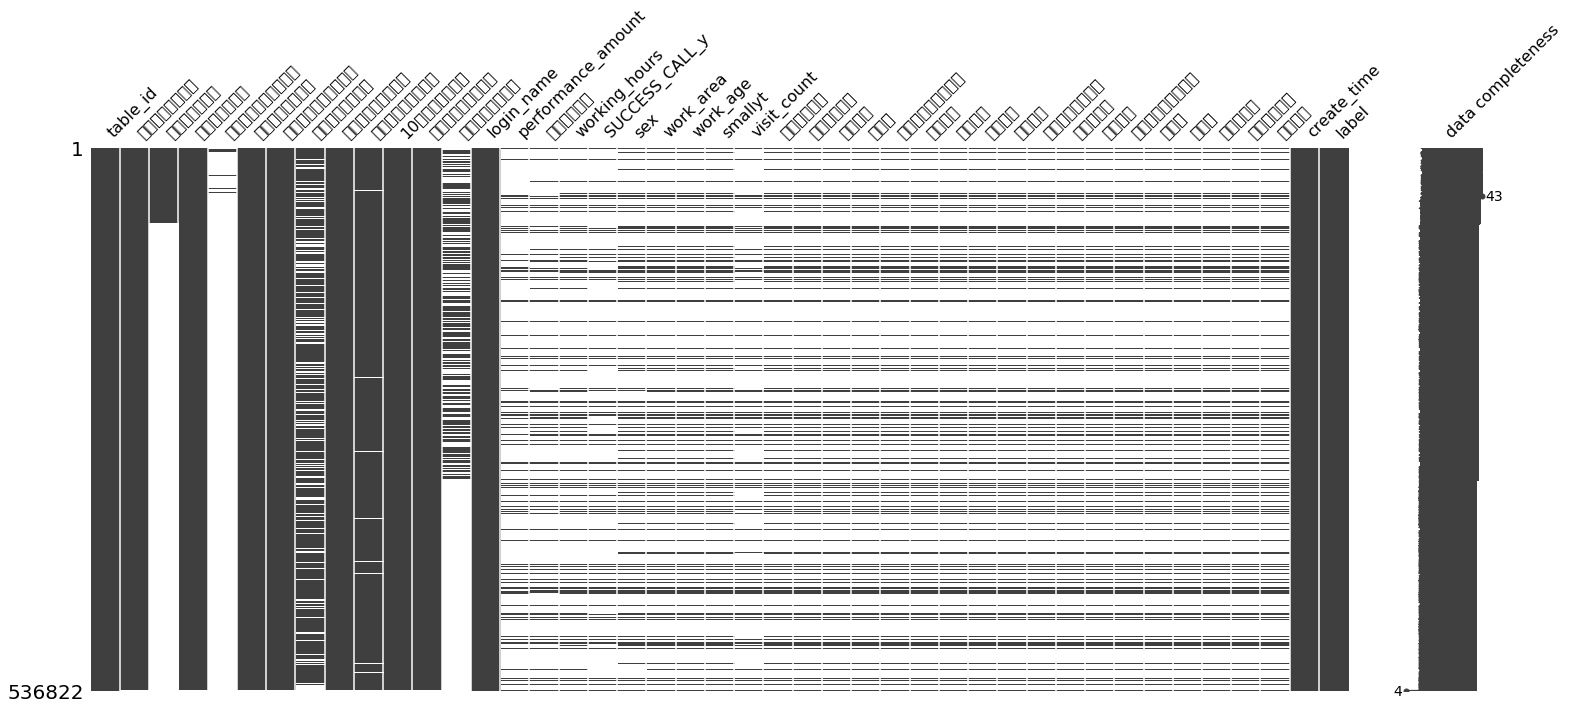

In [30]:
msno.matrix(df2, labels=True)